# Binarize wine data so I can handle this as a classification task

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

seed_num=42

wine_file = '../../../data/wine_quality/raw/winequality-red.csv'
#df = pd.read_csv(wine_file, delimiter=';') # Load the data
df = pd.read_csv(wine_file, delimiter=';')

In [3]:
X=df.drop("quality", axis=1)

In [4]:
y=df.quality

<AxesSubplot:>

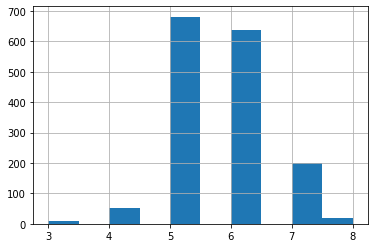

In [5]:
# plot histogram to find a cut point
y.hist()

In [6]:
# 6 seems reasonable
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
y_bin=y.apply(lambda x: 1 if x>=6 else 0)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=seed_num)

In [10]:
from interpret import show
from interpret.glassbox import ExplainableBoostingClassifier


In [11]:
ebm_clf=ExplainableBoostingClassifier(random_state=seed_num)

In [12]:
ebm_clf.fit(X_train, y_train)

# ebm globa
ebm_clf_global = ebm_clf.explain_global(name = 'EBM')
# show(ebm_global)

In [13]:
y_pred=ebm_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.771875

In [15]:
import utils

global_df=utils.get_global_df(X, ebm_clf)

In [20]:
global_df

names    scores  upper_bounds  lower_bounds       col_name
0    4.600000 -0.170088     -0.072976     -0.267199  fixed acidity
1    4.800000 -0.142317     -0.034971     -0.249663  fixed acidity
2    4.950000 -0.142317     -0.034971     -0.249663  fixed acidity
3    5.050000 -0.142317     -0.034971     -0.249663  fixed acidity
4    5.150000 -0.142317     -0.034971     -0.249663  fixed acidity
..        ...       ...           ...           ...            ...
55  13.450000  1.156155      1.322595      0.989715        alcohol
56  13.583333  1.156155      1.322595      0.989715        alcohol
57  13.800000  1.156155      1.322595      0.989715        alcohol
58  14.450000  1.156155      1.322595      0.989715        alcohol
59  14.900000  1.156155      1.322595      0.989715        alcohol

[1178 rows x 5 columns]

In [16]:
global_df.groupby("col_name").apply(lambda x: x.scores.mean())

col_name
alcohol                 0.378884
chlorides              -0.120077
citric acid             0.075352
density                 0.082865
fixed acidity           0.049531
free sulfur dioxide    -0.023600
pH                     -0.081037
residual sugar         -0.015871
sulphates               0.231997
total sulfur dioxide   -0.378549
volatile acidity       -0.176545
dtype: float64

In [17]:
score_df=utils.get_score_variance_table(global_df, ebm_clf)

In [21]:
score_df

min       max  max_min_gap  \
col_name                                                
alcohol              -0.761222  1.318522     2.079745   
chlorides            -1.264021  0.419684     1.683705   
citric acid          -0.633045  0.798558     1.431603   
density              -0.307314  1.483861     1.791175   
fixed acidity        -0.498261  0.365496     0.863757   
free sulfur dioxide  -0.245975  0.360444     0.606419   
pH                   -1.259561  0.123338     1.382900   
residual sugar       -0.412960  0.822683     1.235643   
sulphates            -0.948453  1.151595     2.100048   
total sulfur dioxide -1.908631  0.798150     2.706781   
volatile acidity     -0.869984  0.547119     1.417103   

                      max_min_gap_excld_extrm  feature_importance       std  
col_name                                                                     
alcohol                              2.079745            0.554376  0.810128  
chlorides                            1.433495            0.132263  0.378341  
citric acid                          0.636537            0.086953  0.233537  
density                              0.665837            0.247473  0.357809  
fixed acidity                        0.799778            0.100197  0.246698  
free sulfur dioxide                  0.387696            0.091395  0.133973  
pH                                   0.321785            0.073404  0.249647  
residual sugar                       0.557745            0.070556  0.235045  
sulphates                            1.530890            0.474258  0.591087  
total sulfur dioxide                 2.093342            0.269607  0.795002  
volatile acidity                     1.347435            0.297957  0.437901

plt.scatter(x=score_df.max_min_gap_excld_extrm, y=score_df.feature_importance)

plt.scatter(x=score_df.max_min_gap, y=score_df.feature_importance)



score_df.sort_values("max_min_gap",ascending=False).head(20)

score_df.sort_values("feature_importance",ascending=False).head(20)

In [18]:
fi_df=utils.get_feature_importance_df(X, ebm_clf)

In [19]:
fi_df

feature  importance
0          fixed acidity    0.100197
1       volatile acidity    0.297957
2            citric acid    0.086953
3         residual sugar    0.070556
4              chlorides    0.132263
5    free sulfur dioxide    0.091395
6   total sulfur dioxide    0.269607
7                density    0.247473
8                     pH    0.073404
9              sulphates    0.474258
10               alcohol    0.554376